**Regresiones lineales simples**

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')

In [2]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Se define el target, la cual es la variable que se quiere predecir según la variable 'x'

In [4]:
target = data['ap_lo']
x = data['ap_hi']

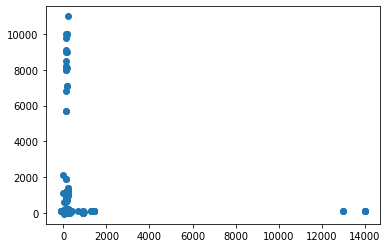

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, target, 'o')

Hay muchos outliers, hay que limpiar

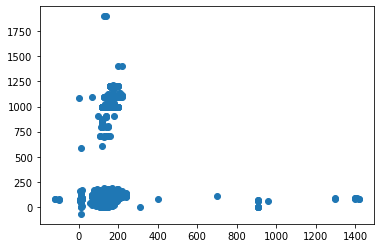

In [6]:
data = data[data['ap_hi'] < 2000]
data = data[data['ap_lo'] < 2000]
target = data['ap_lo']
x = data['ap_hi']
plt.plot(x, target, 'o')

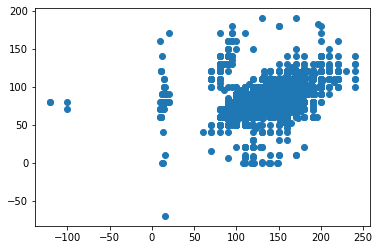

In [7]:
data = data[data['ap_hi'] < 250]
data = data[data['ap_lo'] < 250]
target = data['ap_lo']
x = data['ap_hi']
plt.plot(x, target, 'o')

In [ ]:
data = data[data['ap_hi'] > 250]
data = data[data['ap_lo'] > 250]
target = data['ap_lo']
x = data['ap_hi']
plt.plot(x, target, 'o')

Se hace la separación de los datos para entrenar y datos para testear el modelo

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=0)
#test_size define cual es el porcentaje de datos que serán para testeo

Se hacen las transformaciones para que el regressor funcione (normalmente hay que hacerlo cuando se leen df's con pandas)

In [93]:
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

Entrenamos el modelo

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Recibimos los coeficientes de la regresión

In [95]:
b0 = float(regressor.intercept_)
b1 = float(regressor.coef_)
r21= float(regressor.score(X_test, y_test))
r22= float(regressor.score(X_train, y_train))


print(b0)
print(b1)
print(r21)
print(r22)

71.77702452733818
0.0012723884633524358
0.0005775014030642289
0.00026912772212994707


Gráfico de los resultados

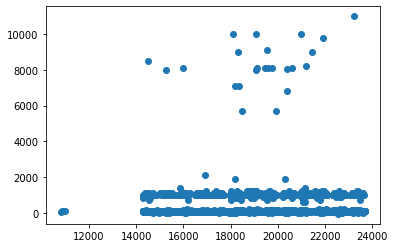

In [96]:
import matplotlib.pyplot as plt

plt.plot(x, target, 'o')

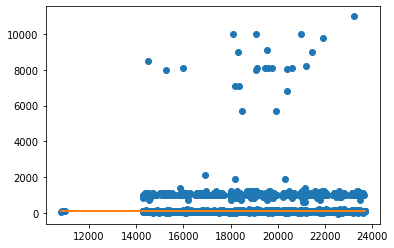

In [97]:
plt.plot(x, target, 'o')
plt.plot(x, b1*x + b0)

In [50]:
y_pred = regressor.predict(np.array(X_test).reshape(-1,1))
y_pred

array([[72.8162898 ],
       [72.8162898 ],
       [71.12150448],
       ...,
       [71.68643292],
       [74.51107513],
       [75.07600357]])

In [24]:
df = pd.DataFrame({'Actual': y_test.reshape(1,-1)[0], 'Predicted': y_pred.reshape(1,-1)[0]})
df

,Actual,Predicted
0,61.0,74.540497
1,54.0,74.032797
2,69.0,77.079000
3,57.0,75.555898
4,110.0,70.986593
...,...,...
13995,100.0,69.971192
13996,80.0,75.048198
13997,68.0,51.693974
13998,79.0,76.571299


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.61199610056781
Mean Squared Error: 193.93792478624638
Root Mean Squared Error: 13.926159728591598


Mean Absolute Error o Error Absoluto Promedio indica en promedio cuanto se equivoca el modelo (en unidades de la variable objetivo)

Mean Squared Error o Error Cuadrático Medio mide cuan disperso es el error de el modelo, es la carianza del error, mientras que el RMSE es la desviación estándar del error

***EJERCICIO***

Seleccione una de las variables contínuas para desarrollar una regresión lineal, grafíquela y evalúela.